## Resources

1. SATS Technical Analysis (https://www.theancientbabylonians.com/sats-technical-analysis-in-python/)
1. Retrieving data from Yahoo Finance (https://investmentmoats.com/uncategorized/solution-to-yahoo-finance-data-not-refreshing-in-google-spreadsheet/)
3. More on Yahoo Finance (https://towardsdatascience.com/free-stock-data-for-python-using-yahoo-finance-api-9dafd96cad2e)
4. Pushing Jupyter Notebooks to Github (https://docs.qubole.com/en/latest/user-guide/notebooks-and-dashboards/notebooks/jupyter-notebooks/managing-jupy-notebook-versions/link-jupy-notebook-github.html)

## Imports?

In [40]:
import requests
import json

import pandas as pd
import matplotlib.pyplot as plt

from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20,10)

### Config

In [11]:
api_url = 'https://query2.finance.yahoo.com/v10/finance/quoteSummary/'
ticker = 'TIGR'
query = '?modules=price'

url = api_url + ticker + query

In [12]:
url

'https://query2.finance.yahoo.com/v10/finance/quoteSummary/TIGR?modules=price'

In [30]:
api_key = 'QK75OR8L2682X2DI'

### Testing

In [25]:
response = requests.get(url)
response.status_code

200

In [28]:
response.json()

{'quoteSummary': {'result': [{'price': {'maxAge': 1,
     'preMarketChangePercent': {'raw': 0.03539332, 'fmt': '3.54%'},
     'preMarketChange': {'raw': 0.63000107, 'fmt': '0.63'},
     'preMarketTime': 1616588224,
     'preMarketPrice': {'raw': 18.43, 'fmt': '18.43'},
     'preMarketSource': 'FREE_REALTIME',
     'postMarketChangePercent': {'raw': 0.0325843, 'fmt': '3.26%'},
     'postMarketChange': {'raw': 0.58, 'fmt': '0.58'},
     'postMarketTime': 1616543979,
     'postMarketPrice': {'raw': 18.38, 'fmt': '18.38'},
     'postMarketSource': 'FREE_REALTIME',
     'regularMarketChangePercent': {'raw': -0.07388138, 'fmt': '-7.39%'},
     'regularMarketChange': {'raw': -1.4200001, 'fmt': '-1.42'},
     'regularMarketTime': 1616529603,
     'priceHint': {'raw': 2, 'fmt': '2', 'longFmt': '2'},
     'regularMarketPrice': {'raw': 17.8, 'fmt': '17.80'},
     'regularMarketDayHigh': {'raw': 19.3, 'fmt': '19.30'},
     'regularMarketDayLow': {'raw': 17.5, 'fmt': '17.50'},
     'regularMarketVo

In [29]:
response.json()['quoteSummary']

{'result': [{'price': {'maxAge': 1,
    'preMarketChangePercent': {'raw': 0.03539332, 'fmt': '3.54%'},
    'preMarketChange': {'raw': 0.63000107, 'fmt': '0.63'},
    'preMarketTime': 1616588224,
    'preMarketPrice': {'raw': 18.43, 'fmt': '18.43'},
    'preMarketSource': 'FREE_REALTIME',
    'postMarketChangePercent': {'raw': 0.0325843, 'fmt': '3.26%'},
    'postMarketChange': {'raw': 0.58, 'fmt': '0.58'},
    'postMarketTime': 1616543979,
    'postMarketPrice': {'raw': 18.38, 'fmt': '18.38'},
    'postMarketSource': 'FREE_REALTIME',
    'regularMarketChangePercent': {'raw': -0.07388138, 'fmt': '-7.39%'},
    'regularMarketChange': {'raw': -1.4200001, 'fmt': '-1.42'},
    'regularMarketTime': 1616529603,
    'priceHint': {'raw': 2, 'fmt': '2', 'longFmt': '2'},
    'regularMarketPrice': {'raw': 17.8, 'fmt': '17.80'},
    'regularMarketDayHigh': {'raw': 19.3, 'fmt': '19.30'},
    'regularMarketDayLow': {'raw': 17.5, 'fmt': '17.50'},
    'regularMarketVolume': {'raw': 6307347,
     'fmt':

## Implementing SATS technical analysis

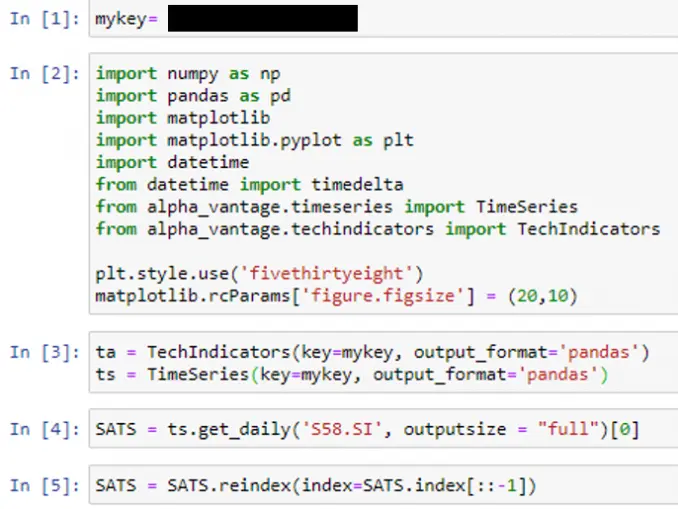

In [33]:
ta = TechIndicators(key=api_key, output_format='pandas')
ts = TimeSeries(key=api_key, output_format='pandas')

In [34]:
tigr = ts.get_daily('TIGR', outputsize="full")[0]

In [35]:
tigr = tigr.reindex(index=tigr.index[::-1])

In [36]:
tigr

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2021-03-23,18.6035,19.3000,17.5000,17.80,6665119.0
2021-03-22,20.9600,20.9700,18.9000,19.22,6112307.0
2021-03-19,21.1300,21.2400,19.8100,20.76,4054573.0
2021-03-18,20.7600,22.1699,20.7500,20.99,4055780.0
2021-03-17,20.0235,21.8500,19.7000,21.41,5184575.0
2021-03-16,23.5706,23.8000,20.4100,21.27,7579363.0
2021-03-15,24.2700,24.3400,21.7800,22.60,7641932.0
2021-03-12,21.8250,24.5800,21.4200,23.74,7764155.0
2021-03-11,20.2937,23.8500,20.1000,23.77,10013113.0


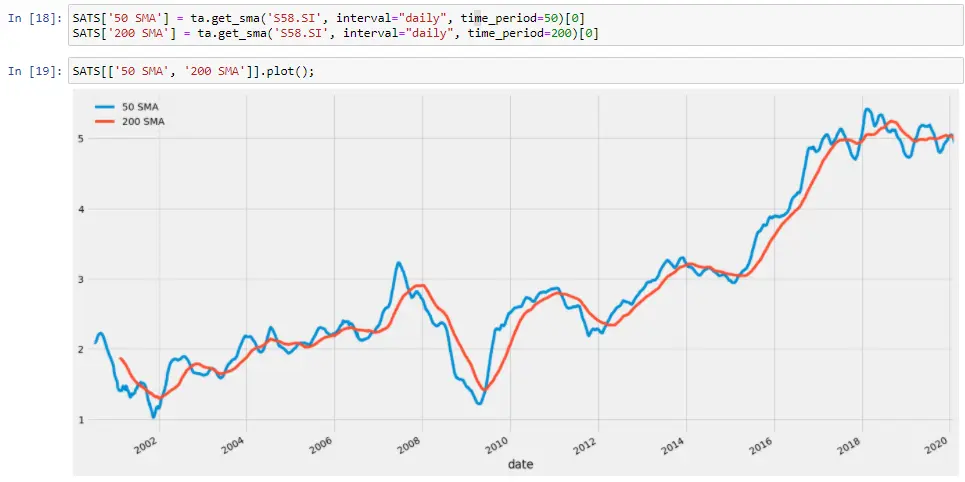

In [37]:
tigr['50 SMA'] = ta.get_sma('TIGR', interval='daily', time_period=50)[0]
tigr['200 SMA'] = ta.get_sma('TIGR', interval='daily', time_period=200)[0]

Alright, now we are ready for some technical analysis action. The golden cross strategy is when the 50 SMA crosses above the 200 SMA. Traders and investors take that as a buy signal. Vice versa, when the 50 SMA crosses below the 200 SMA, that is a bearish signal.

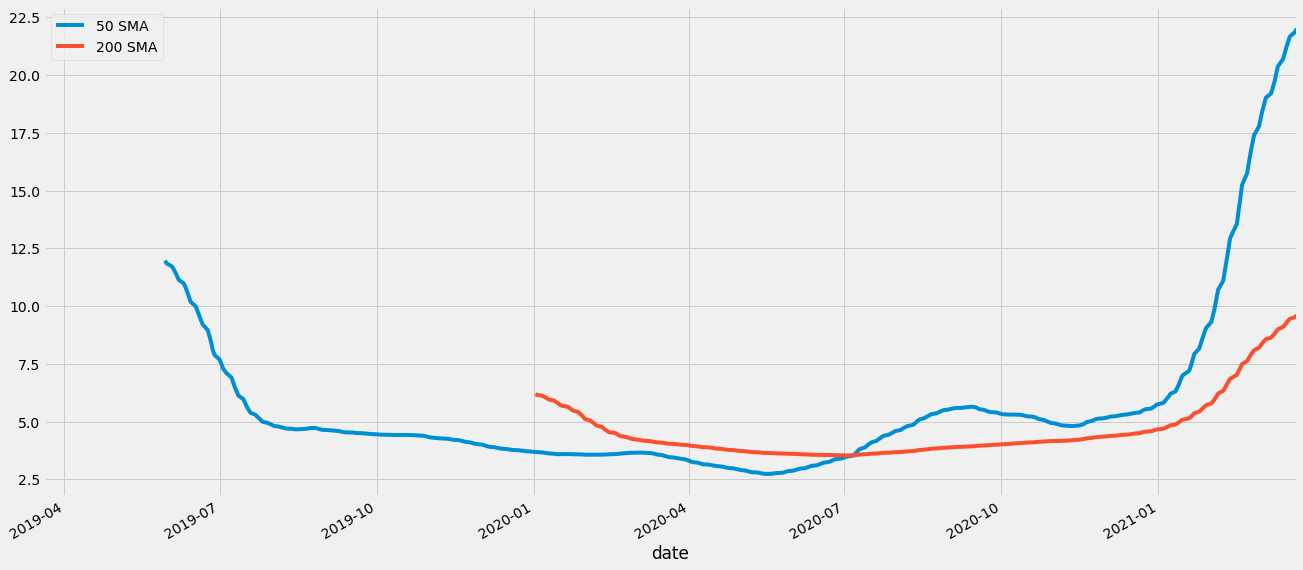

In [41]:
tigr[['50 SMA', '200 SMA']].plot()

plt.show()

### VWAP

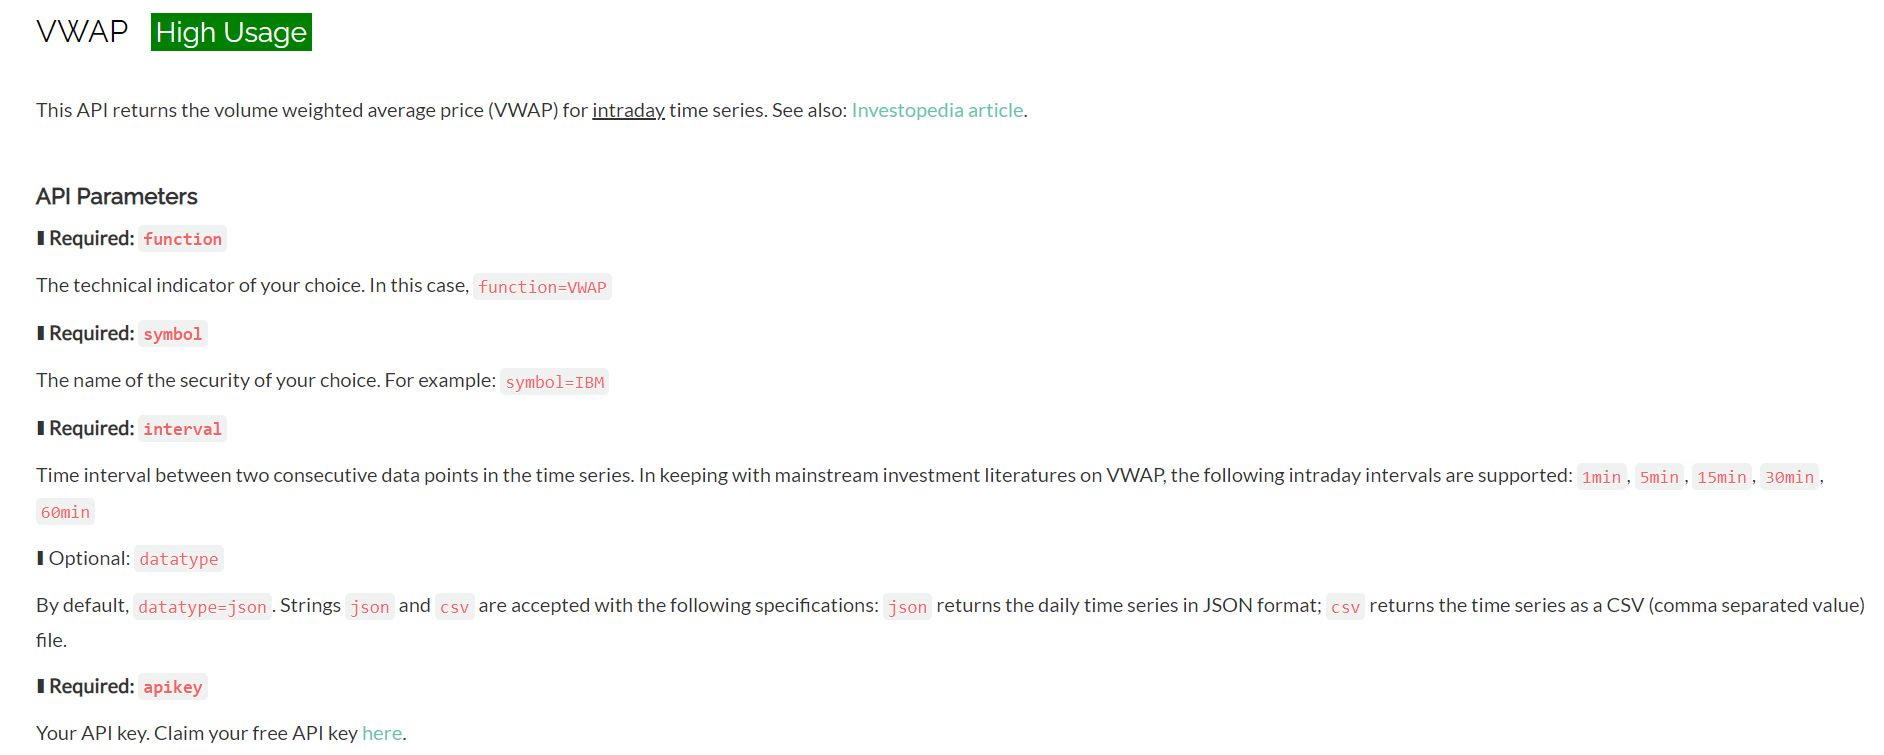

In [44]:
ta.get_vwap('TIGR', interval='15min')

(                        VWAP
 date                        
 2021-02-10 04:15:00  30.4233
 2021-02-10 04:30:00  30.4638
 2021-02-10 04:45:00  30.4998
 2021-02-10 05:00:00  30.8628
 2021-02-10 05:15:00  30.9239
 2021-02-10 05:30:00  30.9308
 2021-02-10 05:45:00  30.9348
 2021-02-10 06:00:00  30.9380
 2021-02-10 06:15:00  30.9416
 2021-02-10 06:30:00  30.9380
 2021-02-10 06:45:00  30.9361
 2021-02-10 07:00:00  30.9372
 2021-02-10 07:15:00  30.9307
 2021-02-10 07:30:00  30.9327
 2021-02-10 07:45:00  30.9417
 2021-02-10 08:00:00  30.9708
 2021-02-10 08:15:00  31.0055
 2021-02-10 08:30:00  31.0142
 2021-02-10 08:45:00  31.0305
 2021-02-10 09:00:00  31.0378
 2021-02-10 09:15:00  31.0322
 2021-02-10 09:30:00  31.0495
 2021-02-10 09:45:00  31.1343
 2021-02-10 10:00:00  31.0037
 2021-02-10 10:15:00  30.9990
 2021-02-10 10:30:00  30.8368
 2021-02-10 10:45:00  30.7196
 2021-02-10 11:00:00  30.6247
 2021-02-10 11:15:00  30.5914
 2021-02-10 11:30:00  30.5751
 ...                      ...
 2021-03-2